## Prepared by:

Nazzeef Nazri

a1621410

# Assessment 3 - Case Study Report

This notebook will demonstrate the application of a supervised machine learning model using the historical Apple stock data extracted from Yahoo Finance. 

The machine learning pipeline has six main steps:

 1. Problem definition where you define your problem;
 2. Data ingestion where you collect your data;
 3. Data preparation where you clean your data;
 4. Data segregation where you separate your data;
 5. Model training where you use the machine learning algorithms;
 6. Candidate model evaluation where you evaluate the models you have used.

# Step 1: Problem Statement

1. Can supervised machine learning models predict the next day stock returns in order to generate profitable trading signals?
2. Can these models explain which technical indicators are best at predicting next day stock returns, and by extension, the trading strategy to adopt for a particular stock?

# Step 2: Data ingestion

We collected the historical Apple Stock data from Yahoo Finance with the dates ranging from 1st April 2016 to 1st April 2021 (5 years historical data)

The Apple stock is synonymously referred in the stock exchange with the ticker symbol 'AAPL'. 

The steps for collecting the data using the yfinance package is found described by Shah (2020). 

The **Apple Stock dataset** has 7 variables and 1321 rows of stock data. The data consists of Open-High-Low-Close prices and Volume data. They are as follows: 
* `Date`: The date the stock data is published
* `Open`: The price that the AAPL stock started trading for the day
* `High`: The maximum AAPL stock price at a given time period for the day
* `Low`: The minimum AAPL stock price at a given time period for the day
* `Close`: The price that the AAPL stock ended trading for the day
* `Adj Close`: The price that the AAPL stock ended trading for the day adjusted for corporate actions such as dividends, stock splits, and new share issuance.
* `Volume`: The total amount of trading activity for the AAPL stock. 


The predictor and target variables will be created using this raw data.

#### 2.1 Collecting the data:

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# To extract historical stock data 
import yfinance as yf

# For producing technical indicators
import talib as ta

# For plotting graphs
import matplotlib.pyplot as plt 
import matplotlib as mpl

# To access datetime
from datetime import datetime    
%matplotlib inline

# To ignore the warnings
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
# Downloading historical AAPL stock data from 01/01/2016 to 01/04/2021
df_aapl = yf.download('AAPL','2016-04-02','2021-04-02')

[*********************100%***********************]  1 of 1 completed


#### 2.2 Investigating the characteristics of the data:

In [3]:
# Convert date index into a column
df_aapl.reset_index(level=0, inplace=True)

In [4]:
# Prepare data
df_aapl['year'] = [d.year for d in df_aapl.Date]
df_aapl['month'] = [d.strftime('%b') for d in df_aapl.Date]
years = df_aapl['year'].unique()

In [5]:
# Print the first and the last date of the dataframe
print('First date:', df_aapl.Date.min(), ' Last Date:', df_aapl.Date.max())

First date: 2016-04-01 00:00:00  Last Date: 2021-04-01 00:00:00


In [6]:
# Prints the dimension of the dataframe
df_aapl.shape

(1260, 9)

In [7]:
# Prints the first 5 rows of the dataframe
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
0,2016-04-01,27.195000,27.500000,27.049999,27.497499,25.575666,103496000,2016,Apr
1,2016-04-04,27.605000,28.047501,27.567499,27.780001,25.838421,149424800,2016,Apr
2,2016-04-05,27.377501,27.682501,27.355000,27.452499,25.533810,106314800,2016,Apr
3,2016-04-06,27.557501,27.745001,27.299999,27.740000,25.801216,105616400,2016,Apr
4,2016-04-07,27.487499,27.605000,27.030001,27.135000,25.238501,127207600,2016,Apr


In [8]:
# Prints the last 5 rows of the dataframe
df_aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month
1255,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900,2021,Mar
1256,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200,2021,Mar
1257,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900,2021,Mar
1258,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800,2021,Mar
1259,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400,2021,Apr


In [9]:
# Prints a summary of the dataframe
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
 7   year       1260 non-null   int64         
 8   month      1260 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 88.7+ KB


In [10]:
# Generate descriptive statistics of the dataframe
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,year
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000
mean,56.778028,57.401306,56.159502,56.806563,55.665283,1.299453e+08,2018.246825
std,30.139081,30.573186,29.597485,30.093071,30.573362,5.867933e+07,1.480677
min,22.500000,22.917500,22.367500,22.584999,21.134403,4.544800e+07,2016.000000
25%,37.550001,37.956876,37.281876,37.624375,36.060785,9.104090e+07,2017.000000
50%,46.483751,46.841249,46.160000,46.488750,45.149832,1.137230e+08,2018.000000
75%,66.499998,67.171875,65.780003,66.626875,66.037977,1.503802e+08,2019.250000
max,143.600006,145.089996,141.369995,143.160004,142.946396,4.584084e+08,2021.000000


# Step 3: Data Preparation


## 3.1 Checking for anomalies

We will perform a quick check and address any anomalies (if any). In essence, we want to ensure that the data is:
1. Currency 
   * Data is up to date (not an issue for this scenario). We will be looking at 5 years worth of historical AAPL stock data from 01 April 2016 until 01 April 2021. 
2. Consistency
   * Data is usable. There are no data format/irregularities, spelling/typos, domain format errors or use of special characters (syntactical anomalies). This is not an issue for our scenario. 
3. Accurate
   * Data is not wrong. There are no duplicates, invalid observations or contradictions (semantic anomalies). 
4. Complete
   * There are no missing values (coverage anomalies)

#### 3.1.1 Checking if there are any missing values (coverage anomalies)

In [11]:
# Checking if there are any missing values
df_aapl.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
dtype: int64

Based on the above, there are no missing values.

#### 3.1.2 Checking if there are any duplicated values (semantic anomalies)

In [12]:
# Checking if there are any duplicated values
df_aapl.duplicated().sum()

0

Based on the above, there are no duplicated values.

#### 3.1.3 Checking for any irregularites such as data format, etc (syntactical anomalies)

In [13]:
df_aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year',
       'month'],
      dtype='object')

In [14]:
df_aapl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
year                  int64
month                object
dtype: object

Date is in datetime format, which is accurate. 

The prices (Open, High, Low, Close, Adj Close) are in float format whereas the Volume is in int format. 

## 3.2 Exploratory data analysis

#### 3.2.1 Understanding time series patterns

Time series data exhibits a variety of patterns, namely:
 1. Trend, which refers to the changing direction of the series (i.e increasing or decreasing). 
 2. Seasonality occurs where a time series is affected by seasonal factors such as time of the year or day of the week. It is always a fixed and known period.  
 3. Cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle.” The duration of these fluctuations is usually at least 2 years. (Hyndman & Athanasopoulos 2021)

#### 3.2.2 Stationarity

#### What is stationarity? 

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times (Hyndman & Athanasopoulos 2021).

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.


#### Why is stationarity important?

Using non-stationary time series data in financial models produces unreliable and spurious results and leads to poor understanding and forecasting. The solution to the problem is to transform the time series data so that it becomes stationary. (Iordanova 2020). 

In [15]:
# Converting Date to index 
df_aapl.set_index('Date', inplace=True)

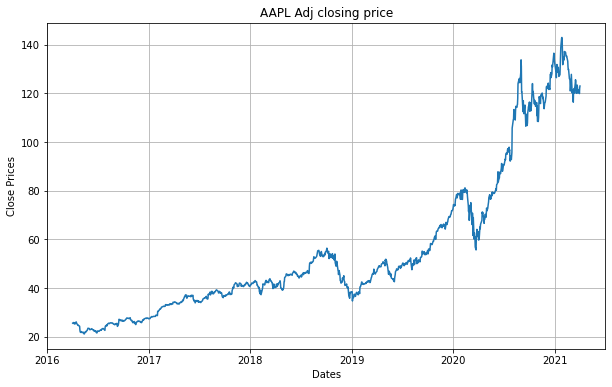

In [16]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df_aapl['Adj Close'])
plt.title('AAPL Adj closing price')
plt.show()

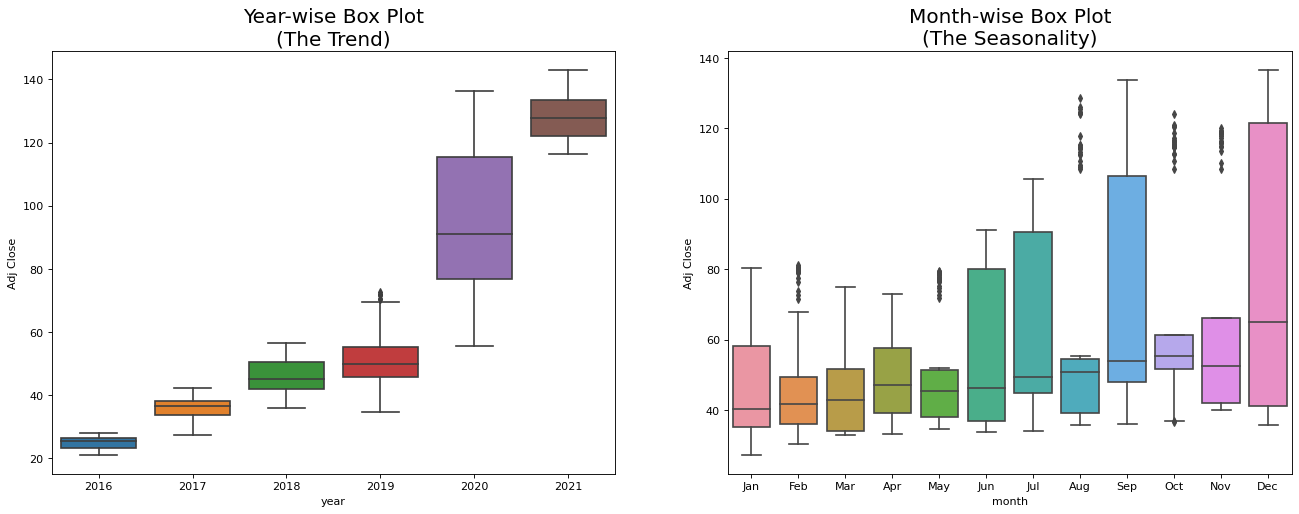

In [17]:
import seaborn as sns
df_aapl.reset_index(inplace=True)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Adj Close', data=df_aapl, ax=axes[0])
sns.boxplot(x='month', y='Adj Close', data=df_aapl.loc[~df_aapl.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

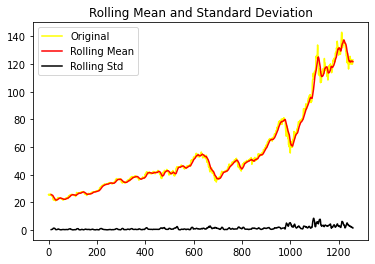

Results of dickey fuller test
Test Statistics                   0.273960
p-value                           0.976118
No. of lags used                 20.000000
Number of observations used    1239.000000
critical value (1%)              -3.435639
critical value (5%)              -2.863876
critical value (10%)             -2.568013
dtype: float64


In [19]:
test_stationarity(df_aapl['Adj Close'])

#### Important Inferences
 
   * The variance and the mean value in September and December is much higher than rest of the months indicating a strong seasonal effect. 
   * Explanation: Since 2011, Apple tend to launch their iPhones on September; December accounts for Christmas holidays (Infonewt 2020).
   * The year on year trend clearly shows that the Closing Price of the AAPL stock have been increasing without fail.
   * We can see the increasing mean and standard deviation. Hence, our series is not stationary.

Alternatively, we can use the ADF test in order to confirm the stationarity of the data (Jain 2016).

Exploring data becomes most important in a time series model – without this exploration, you will not know whether a series is stationary or not. 

#### 3.2.3 Removing trend and seasonality

In transforming our time-series data, we will consider two methods for removing trend and seasonality thus turning the data stationary:
 1. Decomposition
 2. Differencing (for financial data - we use Fractional Differencing)

#### 3.2.3.1 Decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category (Hyndman & Athanasopoulos 2021).

When we decompose a time series into components, we usually combine the trend and cycle into a single trend-cycle component (often just called the trend for simplicity). Thus we can think of a time series as comprising three components: 
 * A trend-cycle component, 
 * a seasonal component, and 
 * a remainder/residual component (containing anything else in the time series). 

We will extract these components from a time series in order to improve our understanding of the time series as well as improve forecast accuracy.

<Figure size 432x288 with 0 Axes>

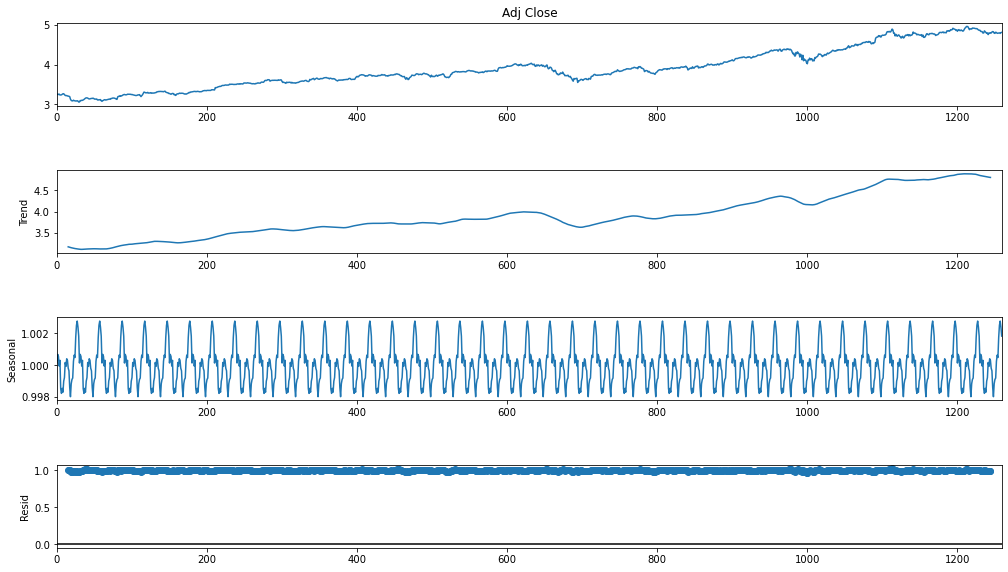

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Applying log transformation on Close price
aapl_log = np.log(df_aapl['Adj Close'])

decomposition = seasonal_decompose(aapl_log, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(16, 9)

In [21]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

The residual component shown in the bottom panel is what is left over when the seasonal and trend-cycle components have been subtracted from the data.

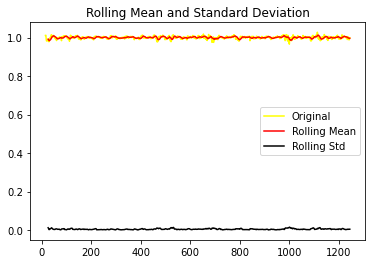

Results of dickey fuller test
Test Statistics               -9.907222e+00
p-value                        3.239387e-17
No. of lags used               2.100000e+01
Number of observations used    1.208000e+03
critical value (1%)           -3.435775e+00
critical value (5%)           -2.863936e+00
critical value (10%)          -2.568045e+00
dtype: float64


In [22]:
aapl_decompose = residual
aapl_decompose.dropna(inplace=True)
test_stationarity(aapl_decompose)

In [23]:
aapl_decompose.head()

15    1.010864
16    1.011101
17    1.011635
18    0.993344
19    0.984179
Name: resid, dtype: float64

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. This time series is very close to stationary. 

However, based on the above, the AAPL stock is very much dominated by the trend and the seasonal components of the time series, with the residual component generally playing a minor role. For this reason, we will consider a differencing method for removing the trend and seasonality. 

#### 3.2.3.2 Differencing 

The commonly used transformation to make a series stationary is differencing up to some order: first order differencing is simply subtracting from each value the preceding one (extracting the rate of change). Second order differencing repeats this process for the resulting series and so on for higher orders. Eg in financial time series, you would consider (log) returns instead of absolute prices to make the model agnostic to the specific price level (in fact, for most financial sequences, first order differencing suffices to ensure stationarity. However, on the other hand, it wipes out memory which is the basis for the predictive power of the model: differencing restricts how past information propagates through the series (Kuttruff 2019)

In order to preserve the memory, we will use Fractional Differencing. Using fractionally differenced variables as dependent variables or features for time series modelling could improve predictive performance in many cases because the time series is allowed to retain more memory while still being stationary. The codes below is extracted from De Prado's book (De Prado 2018). 

In [24]:
# Function to calculate the weights iteratively till a given threshold
def getWeights_threshold(d, thres):
    # Intitialise inital weight
    w, k = [1.], 1
    while True:
        # Generate weight using previous weight
        w_ = -w[-1]/k*(d-k+1)
        # Break if absolute value of weight is below a prefixed threshold
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
    return np.array(w[::-1]).reshape(-1, 1)

In [25]:
def fracDiff(series, d, thres=0.001):
    # Generate weights using the generator
    w = getWeights_threshold(d, thres)
    df = {}
    # Iterate over each column in the dataframe
    for name in series.columns:
        # Fill in the NaN values previous values
        df_ = pd.Series(series[name].values, index=series.index).fillna(
            method='ffill').dropna()
        x = pd.Series(0, index=df_.index)
        for k in range(w.shape[0]):
            # Apply the generated weights on the lags
            x = x+w[k, 0]*df_.shift(-k)
    # df[name]=x.dropna().copy(deep=True)
    df[name] = x.shift(k).copy(deep=True)
    df = pd.concat(df, axis=1)
    return df

In [26]:
# Function to find the optimal value of d
def findMinD(series):
    # Iterate over a range of d
    for d in np.linspace(0, 1, 11):
        # Find the fractionally differentiated series
        df_ = fracDiff(series, d, thres=0.01).dropna()
        # Get the ADF statistic
        res = adfuller(df_.iloc[:, 0].values, maxlag=1,
                       regression='c', autolag=None)
        # Check if stationary 
        if (res[0] <= res[4]['1%']):
            return d
    return 1.0

In [27]:
# Must use log prices for FD
logAAPL = pd.DataFrame(np.log(df_aapl['Adj Close']))
logAAPL1 = pd.DataFrame(np.log(df_aapl['High']))
logAAPL2 = pd.DataFrame(np.log(df_aapl['Low']))
logAAPL3 = pd.DataFrame(np.log(df_aapl['Open']))

# Find the minimum optimal value of d
d = findMinD(logAAPL)
d1 = findMinD(logAAPL1)
d2 = findMinD(logAAPL2)
d3 = findMinD(logAAPL3)

# Use the minimum value of d to get a FD series
logAAPL_FD = fracDiff(logAAPL, d, thres=0.01)
logAAPL_FD1 = fracDiff(logAAPL1, d1, thres=0.01)
logAAPL_FD2 = fracDiff(logAAPL2, d2, thres=0.01)
logAAPL_FD3 = fracDiff(logAAPL3, d3, thres=0.01)

# Remove NaN values
logAAPL_FD.dropna(inplace=True)
logAAPL_FD1.dropna(inplace=True)
logAAPL_FD2.dropna(inplace=True)
logAAPL_FD3.dropna(inplace=True)

In [28]:
print("The value of d for generating binomial weights for Fractional differentiation: "+str(d))

The value of d for generating binomial weights for Fractional differentiation: 0.6000000000000001


In [29]:
# ADF statisitc of the log of the original close price
original_adf = adfuller(logAAPL.iloc[:, 0].values)[0]

# Get the daily returns on the close price
diff = logAAPL.pct_change()

# Drop all NaN values
diff.dropna(inplace=True)

# ADF statistic of the daily returns of log of the original close price
log_diff_adf = adfuller(diff.iloc[:, 0].values)[0]

# ADF statisitc of the fractionally differentiated log closing price series
fd_series_adf = adfuller(logAAPL_FD.iloc[:, 0])[0]

In [30]:
# Print the ADF statistic of the series calculated above
print("The adf statistic of the log of the close price: "+str(original_adf))
print("The adf statistic of the returns of the close price: "+str(log_diff_adf))
print("The adf statistic of the fractionally differenced close price: "+str(fd_series_adf))

The adf statistic of the log of the close price: -0.037502952662594326
The adf statistic of the returns of the close price: -10.62266163370912
The adf statistic of the fractionally differenced close price: -0.8701244775265209


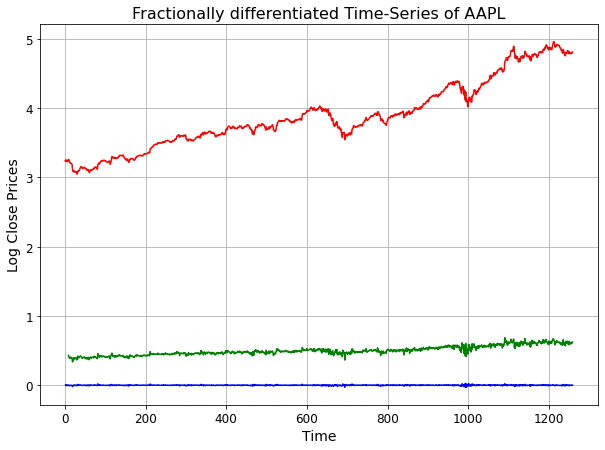

In [31]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Fractionally differentiated Time-Series of AAPL", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Time", fontsize=14)
plt.ylabel("Log Close Prices", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

# Plotting the cumulation of the daily returns of tick bars
plt.plot(logAAPL_FD, color='g')
plt.plot(diff, color='b')
plt.plot(logAAPL, color='r')

plt.show()

As is evident from the graph the fractionally differenced series (green) preserves more memory than the return series (blue) but less than the original series (red). It is a minimally differentiated series that is stationary.

For this reason, we will use the fractionally differenced Close price as one of the input features for our model. 

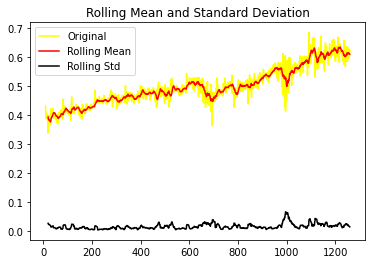

Results of dickey fuller test
Test Statistics                  -0.870124
p-value                           0.797652
No. of lags used                 17.000000
Number of observations used    1234.000000
critical value (1%)              -3.435660
critical value (5%)              -2.863885
critical value (10%)             -2.568019
dtype: float64


In [32]:
test_stationarity(logAAPL_FD)

The Dickey-Fuller test statistic is closer to the 1% critical value. Although the decomposed time series is more stationary, it preserves more memory which is the basis for the predictive power of the model: differencing restricts how past information propagates through the series.

In [33]:
# Adding Close_FD into the df_aapl dataframe
df_aapl['Close_FD'] = logAAPL_FD['Adj Close']

# Adding High_FD into the df_aapl dataframe
df_aapl['High_FD'] = logAAPL_FD1['High']

# Adding Low_FD into the df_aapl dataframe
df_aapl['Low_FD'] = logAAPL_FD2['Low']

# Adding Open_FD into the df_aapl dataframe
df_aapl['Open_FD'] = logAAPL_FD3['Open']

In [34]:
df_aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,Close_FD,High_FD,Low_FD,Open_FD
1255,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900,2021,Mar,0.614401,0.606763,0.604769,0.610071
1256,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200,2021,Mar,0.613622,0.618564,0.622182,0.620004
1257,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900,2021,Mar,0.600316,0.596327,0.598470,0.601455
1258,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800,2021,Mar,0.625976,0.632107,0.625568,0.620971
1259,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400,2021,Apr,0.623026,0.623954,0.626409,0.630748


## 3.3 Feature Engineering

### 3.3.1 Creating predictor variables

We will use the following as input features for our models in order to account for the mean-reversion strategy and momentum-based strategy:
 1. Fractionally differenced Close Price
 2. Technical Indicators (ADX, SMA, MACD, RSI, BBANDS, Standard deviation)
 5. Volume 

The technical indicators are created using the TA-Lib package, which we have imported earlier. 

In [35]:
# Computing Average Directional Index (ADX) for 14 days
df_aapl['ADX_FD'] = ta.ADX(df_aapl['High_FD'].values, df_aapl['Low_FD'].values,
                   df_aapl['Close_FD'].values, timeperiod=14)

# Computing Simple Moving Average (SMA) for 20 days
df_aapl['SMA_FD'] = ta.SMA(df_aapl['Close_FD'].values, timeperiod=20)

# Computing Moving Average Convergenge/Divergence (MACD)
df_aapl['macd'], df_aapl['macdsignal'], df_aapl['macdhist'] = ta.MACD(df_aapl['Close_FD'], fastperiod=12, slowperiod=26, signalperiod=9)

In [36]:
# Computing Bollinger Bands (BBANDS) for 5 days
df_aapl['upperband'], df_aapl['middleband'], df_aapl['lowerband'] = ta.BBANDS(df_aapl['Close_FD'].values, timeperiod=5)

# Computing Relative Strength Index (RSI) for 14 days
df_aapl['RSI_FD'] = ta.RSI(df_aapl['Close_FD'].values, timeperiod=14)

# One day returns
df_aapl['ret1'] = df_aapl.Close_FD.pct_change()

# 5 day Standard Deviation
df_aapl['std5'] = df_aapl.ret1.rolling(5).std()

# 10 day Standard Deviation
df_aapl['std10'] = df_aapl.ret1.rolling(10).std()

# 20 day Standard Deviation
df_aapl['std20'] = df_aapl.ret1.rolling(20).std()

# 40 day Standard Deviation
df_aapl['std40'] = df_aapl.ret1.rolling(40).std()

In [37]:
df_aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,Close_FD,...,macdhist,upperband,middleband,lowerband,RSI_FD,ret1,std5,std10,std20,std40
1255,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900,2021,Mar,0.614401,...,0.000067,0.637826,0.612252,0.586678,50.484488,0.008437,0.038674,0.037220,0.052316,0.042551
1256,2021-03-29,121.650002,122.580002,120.730003,121.389999,121.389999,80819200,2021,Mar,0.613622,...,0.000317,0.624029,0.608350,0.592671,50.341088,-0.001268,0.026046,0.033991,0.047649,0.042238
1257,2021-03-30,120.110001,120.400002,118.860001,119.900002,119.900002,85671900,2021,Mar,0.600316,...,-0.000383,0.622586,0.606138,0.589689,47.840760,-0.021684,0.023034,0.034493,0.044672,0.040817
1258,2021-03-31,121.650002,123.519997,121.150002,122.150002,122.150002,118323800,2021,Mar,0.625976,...,0.000848,0.629333,0.612715,0.596098,52.717916,0.042744,0.024987,0.036543,0.045121,0.041375
1259,2021-04-01,123.660004,124.180000,122.489998,123.000000,123.000000,74957400,2021,Apr,0.623026,...,0.001395,0.633394,0.615468,0.597543,52.114597,-0.004713,0.023883,0.031003,0.045152,0.041286


## 3.3.2 Creating target variable

#### 3.3.2.1 Computing Daily Future Returns 

Next, we compute the daily future returns on the close price.

The target variable, that is the variable we are trying to predict, is one-day future returns.

We define the target variable which is the future one-day returns of the Apple stock. <BR>
<font color='blue'>shift(periods=n)</font> shifts the values by n period(s). If the value of n is negative then, it shifts the values backwards and vice-versa.

In [38]:
df_aapl['actual_return'] = df_aapl['Close_FD'].pct_change(1).shift(-1)

In [39]:
# Remove NaN values
df_aapl.dropna(inplace = True)
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,Close_FD,...,upperband,middleband,lowerband,RSI_FD,ret1,std5,std10,std20,std40,actual_return
48,2016-06-09,24.625000,24.997499,24.615000,24.912500,23.312412,106405600,2016,Jun,0.408346,...,0.410767,0.403261,0.395755,50.969145,0.017987,0.013168,0.018303,0.035416,0.040317,-0.030858
49,2016-06-10,24.632500,24.837500,24.620001,24.707500,23.120579,126851600,2016,Jun,0.395745,...,0.411479,0.402950,0.394420,46.102008,-0.030858,0.020629,0.020060,0.034292,0.040462,-0.028131
50,2016-06-13,24.672501,24.780001,24.275000,24.334999,22.772001,152082000,2016,Jun,0.384613,...,0.415526,0.398940,0.382354,42.262212,-0.028131,0.020359,0.020752,0.033499,0.039786,0.028097
51,2016-06-14,24.330000,24.620001,24.187500,24.365000,22.800076,127727600,2016,Jun,0.395419,...,0.412627,0.397051,0.381474,46.886776,0.028097,0.026663,0.022793,0.024898,0.039781,-0.005422
52,2016-06-15,24.455000,24.602501,24.257500,24.285000,22.725216,117780800,2016,Jun,0.393275,...,0.410673,0.395479,0.380286,46.097859,-0.005422,0.026546,0.020267,0.021232,0.039612,0.017521


In [40]:
# Write the dataframe above to CSV 
df_aapl.to_csv("AAPL.csv", index_label='Date')

## 3.3.3 Store the target and input features that will feed the models

#### 3.3.3.1 Storing input features into X

In [41]:
predictor_list = ['ADX_FD', 'SMA_FD', 'macd', 'macdsignal', 'macdhist', 'upperband', 'middleband', 'lowerband', 'RSI_FD', 'Close_FD',
'Volume', 'std5', 'std10', 'std20', 'std40']

X = df_aapl[predictor_list]
X.head()

,ADX_FD,SMA_FD,macd,macdsignal,macdhist,upperband,middleband,lowerband,RSI_FD,Close_FD,Volume,std5,std10,std20,std40
48,10.580275,0.403045,0.002523,0.002877,-0.000354,0.410767,0.403261,0.395755,50.969145,0.408346,106405600,0.013168,0.018303,0.035416,0.040317
49,10.809941,0.404521,0.001771,0.002656,-0.000884,0.411479,0.402950,0.394420,46.102008,0.395745,126851600,0.020629,0.020060,0.034292,0.040462
50,10.246592,0.404583,0.000274,0.002180,-0.001905,0.415526,0.398940,0.382354,42.262212,0.384613,152082000,0.020359,0.020752,0.033499,0.039786
51,9.723483,0.403251,-0.000040,0.001736,-0.001775,0.412627,0.397051,0.381474,46.886776,0.395419,127727600,0.026663,0.022793,0.024898,0.039781
52,9.425555,0.403046,-0.000456,0.001297,-0.001754,0.410673,0.395479,0.380286,46.097859,0.393275,117780800,0.026546,0.020267,0.021232,0.039612


#### 3.3.3.2 Storing target variable into y

In [42]:
target_list = ['actual_return']
y = df_aapl[target_list]
y.head()

,actual_return
48,-0.030858
49,-0.028131
50,0.028097
51,-0.005422
52,0.017521


# Step 4: Data Segregation

We will split the dataset into two parts, first 80% of the dataset will use to create the model and the remaining 20% will be used as a test dataset.

In [43]:
split_percentage = 0.8
split = int(split_percentage*len(X))
# Train data set
X_train = X[:split]
y_train = y[:split]
# Test data set
X_test = X[split:]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(968, 15) (968, 1)
(243, 15) (243, 1)


# Step 5: Model training

## 5.1 Establishing a Naive baseline

In [44]:
baseline = np.mean(y_train)

#Get an array with baseline with the size of the testing dataset 
y_predicted_naive = np.repeat(baseline, len(y_test))

from sklearn.metrics import r2_score
R2_naive = r2_score(y_test, y_predicted_naive)
print('Baseline:')
print('The naive R-squared baseline is', R2_naive)

Baseline:
The naive R-squared baseline is -5.179179043635074e-06


## 5.2 Fitting the model using Random Forest Regressor

Random Forest Regressor is invariant to the scale of the features. This is because RFR is made of multitude of decision trees. A decision tree splits a node based on a single feature. It then splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features (Bhandhari 2020).

For this reason, we will not be normalising the dataset.

In [45]:
# Random forest regressor:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0) 

rfr_model1 = RandomForestRegressor(random_state=0) 

# Fit/train the model
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
#Prediction in the training dataset
y_rfr_train_predict1 = rfr.predict(X_train)

# Prediction in the testing dataset 
y_rfr_test_predict1 = rfr.predict(X_test) 

#### 5.2.1 Evaluating the performance of the model prior to Hyperparameter Tuning 

In [47]:
# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training1 = r2_score(y_train, y_rfr_train_predict1)

R2_test1 = r2_score(y_test, y_rfr_test_predict1)

In [48]:
print('R-squared score')
print('Training data:')
print('The model performance (before hyperparameter tuning) in training dataset is ', R2_training1)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (before hyperparameter tuning) in testing dataset is ', R2_test1)

R-squared score
Training data:
The model performance (before hyperparameter tuning) in training dataset is  0.9037229416725046

R-squared score
Testing data:
The model performance (before hyperparameter tuning) in testing dataset is  -2.0544670355820602


Based on the above, the training set performed significantly better than the test set signifying that the model is prone to overfitting. 

In order to address the above, we will perform hyperparameter tuning. 

## 5.3 Hyperparameter tuning of Random Forest Regressor

In [49]:
rfr_model1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [50]:
# hyperparameters currently in use by our SVR model
rfr_model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### 5.3.1 RandomizedSearchCV

When the dimensionality of the grid is high, the number of computations in Grid Search increases drastically, making it computationally expensive.

Randomized Search is given the number of iterations to be computed and hence is computationally less expensive with a similar level of accuracy as Grid Search, making it a better choice when the dimensionality is high (De Prado 2018). 

In [51]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]}


In [52]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr_model1, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [53]:
# We can view the best parameters from fitting the random search
rfr_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 9,
 'min_samples_leaf': 17,
 'max_depth': 40}

In [54]:
# We then assign the values of the hyperparameters into our model
rfr_model1 = rfr_random.best_estimator_
rfr_model1

RandomForestRegressor(max_depth=40, min_samples_leaf=17, min_samples_split=9,
                      n_estimators=400, random_state=0)

In [55]:
# Fitting the model after hyperparameter tuning:
rfr_model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=17, min_samples_split=9,
                      n_estimators=400, random_state=0)

### 5.3.2 Evaluating the performance of the model after hyperparameter tuning 

In [56]:
# Prediction in the training dataset using tuned hyperparameter:
y_rfr_train_predict2 = rfr_model1.predict(X_train)

# Prediction in the testing dataset using tuned hyperparameter
y_rfr_test_predict2 = rfr_model1.predict(X_test)

# Getting the R-squared scores
from sklearn.metrics import r2_score

R2_training2 = r2_score(y_train, y_rfr_train_predict2)

R2_test2 = r2_score(y_test, y_rfr_test_predict2)

In [57]:
print('R-squared score')
print('Training data:')
print('The model performance (after hyperparameter tuning) in training dataset is ', R2_training2)
print()
print('R-squared score')
print('Testing data:')
print('The model performance (after hyperparameter tuning) in testing dataset is ', R2_test2)

R-squared score
Training data:
The model performance (after hyperparameter tuning) in training dataset is  0.43492959681546395

R-squared score
Testing data:
The model performance (after hyperparameter tuning) in testing dataset is  0.2834282136980948


# Step 6: Model Evaluation 

#### 6.1 Feature importance

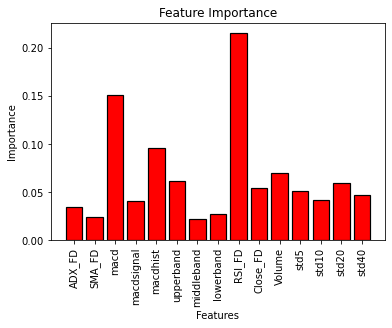

In [58]:
# Get numerical feature importances
X_list = list(X.columns)
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importance');

The two most important indicators are the RSI and MACD, indicating that a momentum-based strategy is the appropriate strategy for the AAPL stock. 

#### 6.2 Plotting the predicted values against real values

Text(0.5, 1.0, 'Comparison between predicted returns using Random Forest Regressor against actual returns')

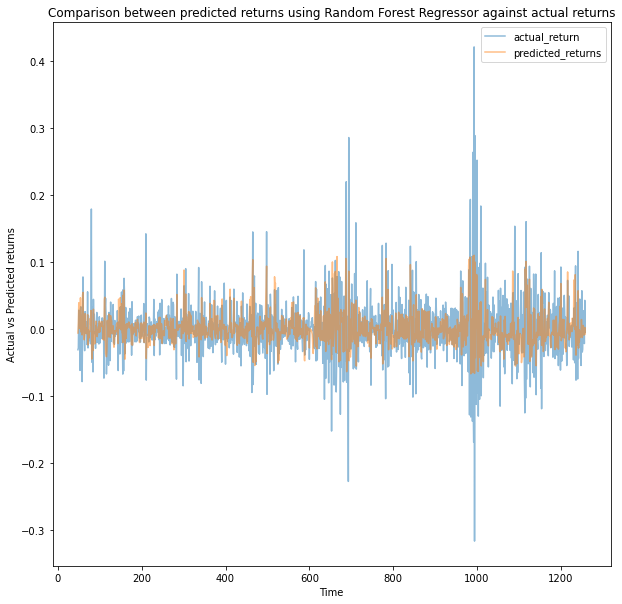

In [59]:
df_aapl['predicted_returns'] = rfr_model1.predict(X)
df_aapl[['actual_return','predicted_returns']].plot(alpha = 0.5, figsize = (10,10))
plt.xlabel('Time')
plt.ylabel('Actual vs Predicted returns')
plt.title('Comparison between predicted returns using Random Forest Regressor against actual returns')

Text(0.5, 1.0, 'Comparison between predicted returns against actual returns using RFR')

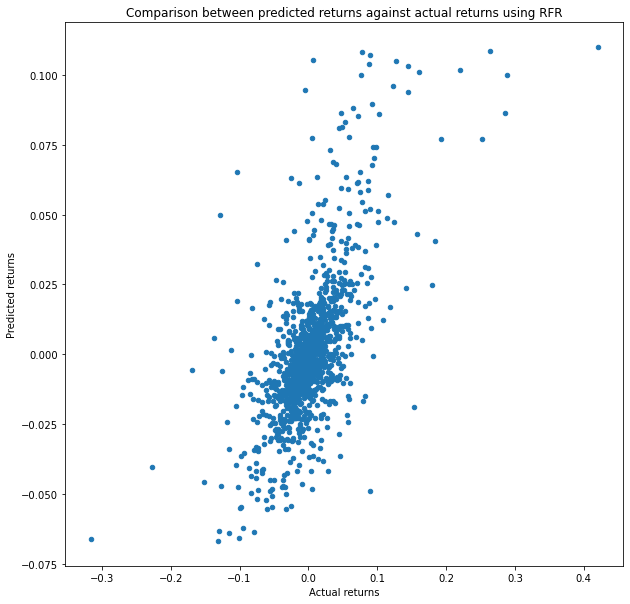

In [60]:
df_aapl.plot.scatter(x = 'actual_return', y = 'predicted_returns', figsize = (10,10))
plt.xlabel('Actual returns')
plt.ylabel('Predicted returns')
plt.title('Comparison between predicted returns against actual returns using RFR')

Based on the above, our model actually predicts with relatively good accuracy where the returns is between -0.25 to 0.25. 

# Signal generation logic

Depending on the predictions, we will buy the stock at open price and sell the stock at close price in the same day where the returns is positive. Conversely, we will short-sell the stock at open price and complete the short-sell at the close price where the returns is negative. 

Based on our model, it appears that it is relatively accurate where the returns range from -0.025 (negative returns) and 0.025 (positive returns). Accordingly, we will generate our signals based on the following:
 * Where the return is above 0 and below 0.025, the returns will be positive and we will designate a signal of 1. 
 * Where the return is below 0 and above -0.025, the returns will be negative and we will designate a signal of -1. 
 * Otherwise, we will designate a signal of 0 indicating no signal is generated. 

In [61]:
def returns_to_class(df):
    if df.predicted_returns > 0.0 and df.predicted_returns < 0.025:
        return 1
    elif df.predicted_returns < 0.0 and df.predicted_returns > -0.025:
        return -1
    else:
        return 0

df_aapl['Class'] = df_aapl.apply(returns_to_class, axis=1)

In [62]:
df_aapl.groupby('Class')['predicted_returns'].count()

Class
-1    561
 0    241
 1    409
Name: predicted_returns, dtype: int64

Once we have defined the different classes for the target variable, we can see their distribution of Returns using the groupby method. As can be observed, out of the total data points majority of them (i.e. 561 data points) belong to '-1' class which signifies negative returns. On the other hand, there are 409 data points belonging to '1', which signifies positive returns. 

In [63]:
signal_list = ['Date','Class', 'predicted_returns']
df_signal = df_aapl[signal_list]

In [64]:
df_signal.set_index('Date', inplace=True)

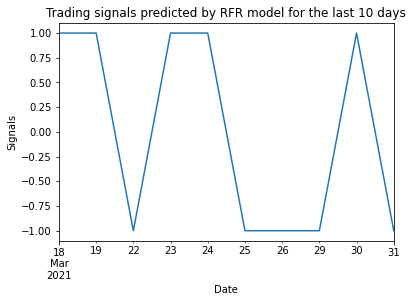

In [65]:
df_signal.Class[-10:].plot()
plt.ylabel('Signals')
plt.title('Trading signals predicted by RFR model for the last 10 days')
plt.show()

The above graph shows the signal predicted for last 10 days. 

## Sharpe Ratio

Sharpe ratio helps to evaluate how good a strategy is. Generally, a strategy with a Sharpe ratio of > 1.5 is considered good (Lioudis 2021). 

The Sharpe ratio is calculated as follows:
 * Sharpe ratio  = (average daily strategy returns / standard deviation of the strategy returns) * sqrt(252)
 * 252 is the number of trading days in a year. We will assume the number to be 252. 

In [66]:
df_aapl['strategy_returns'] = df_aapl.actual_return * df_aapl.Class

In [67]:
# The below function returns the Sharpe ratio for the excess returns 
# (Strategy returns - Risk free rate) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

We calculate the Sharpe ratio for the strategy in train and test dataset. The risk-free rate is assumed to be 5% p.a (Chen 2021).

In [68]:
# Computing Sharpe ratio

df_aapl['excess_daily_strategy_return'] = df_aapl.strategy_returns - 0.05/252

# Train dataset
sharpe_train = annualized_sharpe_ratio(
    df_aapl.excess_daily_strategy_return.iloc[:split])

# Test dataset
sharpe_test = annualized_sharpe_ratio(
    df_aapl.excess_daily_strategy_return.iloc[split:])

In [69]:
# Tabulate the performance in train and test dataset
from tabulate import tabulate
print(tabulate(
    [
        ['Sharpe Ratio', sharpe_train, sharpe_test],
    ],
    headers=['Train set', 'Test Set'],
    tablefmt='orgtbl'))

|              |   Train set |   Test Set |
|--------------+-------------+------------|
| Sharpe Ratio |     5.76938 |    3.17004 |


# Visualising cumulative returns 

#### Cumulative returns in train set

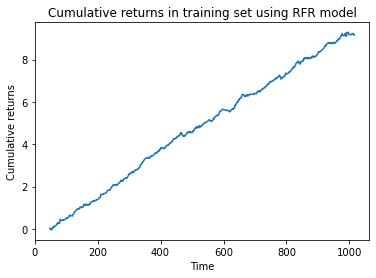

In [70]:
# Plot the cumulative returns in train dataset
df_aapl.strategy_returns[:split].cumsum().plot()

plt.xlabel('Time')
plt.ylabel('Cumulative returns')
plt.title('Cumulative returns in training set using RFR model')

# Show the graph
plt.show()

#### Cumulative returns in test set

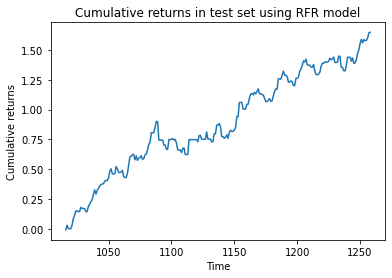

In [71]:
# Plot the cumulative returns in test dataset
df_aapl.strategy_returns[split:].cumsum().plot()

plt.xlabel('Time')
plt.ylabel('Cumulative returns')
plt.title('Cumulative returns in test set using RFR model')

# Show the graph
plt.show()

# References

Bhandari, A 2020, Feature scaling for machine learning: understanding the difference between normalisation vs standardization, Analytics Vidhya, viewed 20 April 2021, <https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ >

Chen, J 2021, Risk free rate of return, Investopedia, viewed 20 April 2021, < https://www.investopedia.com/terms/r/risk-freerate.asp >

De Prado, M.L 2018, Advances in financial machine learning, John Wiley & Sons, Inc., Hoboken, New Jersey

Hyndman, R.J., & Athanasopoulos, G 2021, Forecasting: principles and practice, 3rd Edition, OTexts: Melbourne, Australia, viewed on 20 April 2021, < https://otexts.com/fpp3 > 

Iordanova, T 2020, An introduction to stationary and non-stationary processes,  Investopedia, viewed 20 April 2021, < https://www.investopedia.com/articles/trading/07/stationary.asp >

Infonewt 2020, Visualising apple product release patterns, Infonewt, viewed 20 April 2021, < https://infonewt.com/apple-release-patterns > 

Jain, A 2016, A comprehensive beginner’s guide to create a time series forecast (with codes in Python and R), Analytics Vidhya, viewed 20 April 2021, < https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ >

Kuttruf, S 2019, Preserving memory in stationary time series, Towards Data Science, viewed 20 April 2021, < https://towardsdatascience.com/preserving-memory-in-stationary-time-series-6842f7581800 > 

Lioudis, N 2021, Understanding the sharpe ratio, Investopedia, viewed 20 April 2021, <https://www.investopedia.com/articles/07/sharpe_ratio.asp > 

Shah, I 2020, Historical stock price data in python, Towards Data Science, viewed 20 April 2021, < https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836 > 